<h1> CreditOne <h1>

In [3]:
#Importar librerias
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

#estimators
#from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LinearRegression
#from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split



<h2>Inicio: <br>
    1.Cleaning and Pre-processing <br>
    2.Covariance Estimation <br>
    4.Feature Engineering (either PCA or RFE) and Dimensionality Reduction
<h2>

In [4]:
credit = pd.read_csv('default of credit card clients.csv', header =1)
print(credit)

#Se actualiza nombre de columna
credit = credit.rename(columns={'default payment next month': 'default_payment_next_month'})
credit = credit.rename(columns={'PAY_0': 'PAY_1'})

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

In [5]:
rawData = credit
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_1                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [7]:
#features
features = rawData.iloc[:,1:24]
print('Summary of feature sample')

print(features.head())
covMat = features.cov()
print(covMat)

Summary of feature sample
   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0     -2  ...        689          0          0          0         0       689   
1      0  ...       2682       3272       3455       3261         0      1000   
2      0  ...      13559      14331      14948      15549      1518      1500   
3      0  ...      49291      28314      28959      29547      2000      2019   
4      0  ...      35835      20940      19146      19131      2000     36681   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY

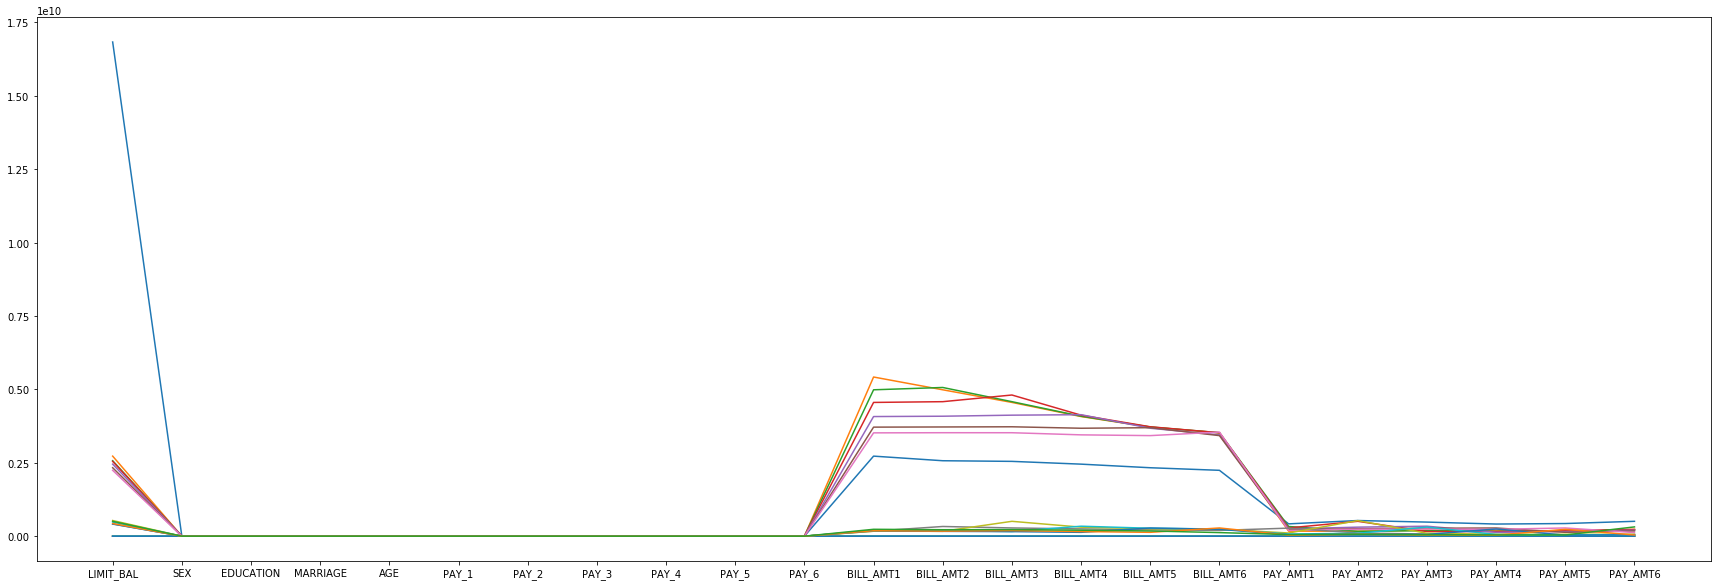

In [8]:
plt.figure(figsize = (30,10))
plt.plot(covMat)


In [ ]:
covMat = features.cov()
print(covMat)

In [ ]:
corr = rawData.drop('ID',axis=1).corr()
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(30, 110, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmin=0,vmax=1, center=0,
            square=True, linewidths=.5)

<h2>Inicio: <br>
    6.Classification (Build three model and choose the best) <br>
    7.Model Tuning (Tune at least two parameters for each model you build) <br>
    8.Model Evaluation
<h2>

In [70]:
size= 0.30
seed= 3000
#num_estimators= 5

Summary of feature sample
   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0     -2  ...        689          0          0          0         0       689   
1      0  ...       2682       3272       3455       3261         0      1000   
2      0  ...      13559      14331      14948      15549      1518      1500   
3      0  ...      49291      28314      28959      29547      2000      2019   
4      0  ...      35835      20940      19146      19131      2000     36681   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY

In [71]:
#dependent variable
depVar = rawData['default_payment_next_month']
print(depVar)
print(len(depVar.index))

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default_payment_next_month, Length: 30000, dtype: int64
30000


In [72]:
#Training Set (Feature Space: X Training)
#X_train = (features[: 24000])
#X_train.head()

x_train, x_test = train_test_split(features, test_size=size, random_state=seed, shuffle=True )


In [73]:
x_train.shape

(21000, 23)

In [75]:
print(x_train.head())
print(x_test.head())

print(len(x_train.index))
print(len(x_test.index))

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
26717      10000    1          1         2   22      0     -1     -1     -1   
26335     300000    2          1         2   32     -2     -2     -2     -2   
12691     180000    1          1         1   35     -1     -1     -1     -1   
295       200000    1          1         2   31      0      0      0      0   
5806      150000    2          2         3   26     -2     -2     -2     -2   

       PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
26717     -1  ...        915        352        105          0        46   
26335     -2  ...      10742       1349      10522          0       788   
12691     -1  ...        395        846       1027        381       396   
295        0  ...     186292     133345     133634     133990      9000   
5806      -2  ...       3177      49174      11823        669     26034   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
26717       915 

In [76]:
#Dependent Variable Training Set (y Training)
#y_train = depVar[: 1000]
#y_train_count = len(y_train.index)
#print('The number of observations in the Y training set are:',str(y_train_count))
#y_train.head()

y_train, y_test = train_test_split(depVar, test_size=size, random_state=seed, shuffle=True )


In [77]:
print(y_test.head())
#print(y_test.head())

print(len(x_test.index))
print(len(y_test.index))

11121    0
745      0
27335    0
20009    0
14001    0
Name: default_payment_next_month, dtype: int64
9000
9000


In [78]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train)

In [79]:
x_train.shape, x_test.shape

((15750, 23), (5250, 23))

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train)
x_train.shape, x_test.shape

((11812, 23), (3938, 23))

In [82]:
#model = LinearRegression(n_jobs=10)
model = RandomForestClassifier(n_jobs=10, 
                             random_state=seed,
                             #criterion=RFC_METRIC,
                             #n_estimators=NUM_ESTIMATORS,
                             verbose=False)

<h2>Fin: Selecting and Dividing the Data<h2>

<h2>Inicio:Building the Models and Choosing the Right Model<h2>

In [83]:
#Models
#modelSVR = SVR()
#modelRF = RandomForestRegressor()
#modelLR = LinearRegression()
modelSVC = SVC()
modelRF = RandomForestClassifier()
modelGBC = GradientBoostingClassifier()


In [84]:
#dependent variable
print(depVar)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default_payment_next_month, Length: 30000, dtype: int64


In [85]:
model.fit(x_train,y_train)

C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=10,
                       oob_score=False, random_state=3000, verbose=False,
                       warm_start=False)

In [86]:
modelRF.fit(x_train,y_train)

C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
modelSVC.fit(x_train,y_train)

C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [40]:
modelGBC.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [41]:
from sklearn.model_selection import cross_val_score

In [87]:
print(cross_val_score(modelSVC, x_train, y_train)) 

C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto'

[0.77831386 0.77882174 0.77667683]


In [89]:
print(cross_val_score(modelRF, x_train, y_train)) 
#These values correspond to the the following:
#1st value:  The score array for test scores on each cv split. (Higher is an indicator of a better performing model)
#2nd value: The time for fitting the estimator on the train set for each cv split.
#3rd Value:  The time for scoring the estimator on the test set for each cv split. 

C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.80497715 0.80827831 0.80284553]


In [44]:
print(cross_val_score(modelGBC, x_train, y_train))

C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.81781826 0.82177778 0.81351411]


In [45]:
preds = modelRF.predict(features)
preds

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [50]:
modelRF.score(x_train,y_train)

0.9807407407407407

In [49]:
#Model Fitting
modelRF.fit(x_train,y_train)
print(cross_val_score(modelRF, x_train, y_train))
print(modelRF.score(x_train,y_train))

C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.80937569 0.80288889 0.7979551 ]
0.9807407407407407


In [52]:
modelSVC.fit(x_train,y_train)
print(cross_val_score(modelSVC, x_train, y_train)) 
print(modelSVC.score(x_train,y_train))

C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto'

[0.77627194 0.77533333 0.77550567]
0.9951111111111111


In [53]:
modelGBC.fit(x_train,y_train)
print(cross_val_score(modelGBC, x_train, y_train)) 
print(modelGBC.score(x_train,y_train))

C:\Users\andg2\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.81737392 0.82155556 0.81351411]
0.8285185185185185


<h2>Fin:Building the Models and Choosing the Right Model<h2>

<H2>Inicio:Making Predictions and Evaluating the Results<h2>

In [54]:
predictionsSVC = modelSVC.predict(x_test)
print(predictionsSVC)

predictionsRF = modelRF.predict(x_test)
print(predictionsRF)

predictionsGBC = modelGBC.predict(x_test)
print(predictionsGBC)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 1]
[0 0 0 ... 0 0 1]


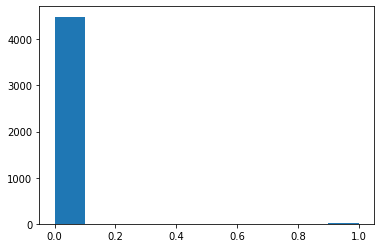

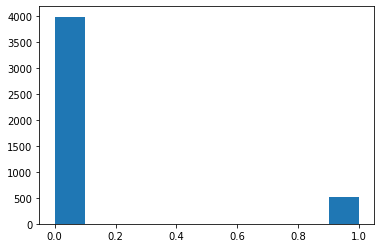

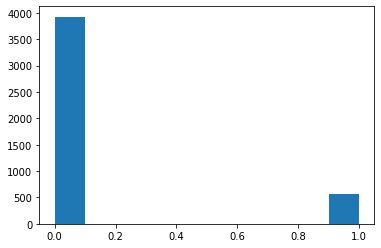

In [55]:
plt.hist(predictionsSVC)
plt.show()

plt.hist(predictionsRF)
plt.show()

plt.hist(predictionsGBC)
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [57]:
from math import sqrt

In [58]:
rmseSVC = sqrt(mean_squared_error(y_test, predictionsSVC))
print(rmseSVC)

rmseRF = sqrt(mean_squared_error(y_test, predictionsRF))
print(rmseRF)

rmseGBC = sqrt(mean_squared_error(y_test, predictionsGBC))
print(rmseGBC)

0.46714261443612937
0.4381780460041329
0.41899350299921784


In [63]:
predRsquaredSVC = r2_score(y_test,predictionsSVC)
print(predRsquaredSVC)

predRsquaredRF = r2_score(y_test,predictionsRF)
print(predRsquaredRF)

predRsquaredGBC = r2_score(y_test,predictionsGBC)
print(predRsquaredGBC)

-0.2848081539234477
-0.13042183807521268
-0.03360330101784492


In [60]:
#Make Predictions
predictionsSVC = modelSVC.predict(x_test)
predRsquaredSVC = r2_score(y_test,predictionsSVC)
rmseSVC = sqrt(mean_squared_error(y_test, predictionsSVC))
print('R Squared: %.3f' % predRsquaredSVC)
print('RMSE: %.3f' % rmseSVC)

predictionsRF = modelRF.predict(x_test)
predRsquaredRF = r2_score(y_test,predictionsRF)
rmseRF = sqrt(mean_squared_error(y_test, predictionsRF))
print('R Squared: %.3f' % predRsquaredRF)
print('RMSE: %.3f' % rmseRF)

predictionsGBC = modelGBC.predict(x_test)
predRsquaredGBC = r2_score(y_test,predictionsGBC)
rmseGBC = sqrt(mean_squared_error(y_test, predictionsGBC))
print('R Squared: %.3f' % predRsquaredGBC)
print('RMSE: %.3f' % rmseGBC)

R Squared: -0.285
RMSE: 0.467
R Squared: -0.130
RMSE: 0.438
R Squared: -0.034
RMSE: 0.419


corr = rawData.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot = True)
plt.show()